In [1]:
from IPython.display import Javascript
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 100})'''))

<IPython.core.display.Javascript object>

## https://docs.trychroma.com/docs/overview/getting-started 🏃

In [2]:
!pip3 install chromadb

In [3]:
import chromadb
chroma_client = chromadb.Client()

In [5]:
try:
  chroma_client.delete_collection(name="gaurav_db") # cleanup if exists
except:
  pass

In [6]:
collection = chroma_client.create_collection(name="gaurav_db")

In [7]:
collection.upsert(
    documents=[
        "This is a document about pineapple",
        "This is a document about oranges"
    ],
    metadatas=[{"source": "source1", "page": 1}, {"source": "source2", "page": 1}],
    ids=["id1", "id2"]
)

/root/.cache/chroma/onnx_models/all-MiniLM-L6-v2/onnx.tar.gz: 100%|██████████| 79.3M/79.3M [00:00<00:00, 91.8MiB/s]


In [8]:
results = collection.query(
    query_texts=["This is a document on apple"], # Chroma will embed this for you
    n_results=2, # how many results to return
    include=['embeddings', 'metadatas', 'documents', 'distances']
)
results

{'ids': [['id1', 'id2']],
 'embeddings': [array([[-7.09367776e-03,  6.55461773e-02, -1.16605973e-02,
           8.64458382e-02, -3.95435765e-02,  5.80052547e-02,
          -2.40756273e-02,  1.49505800e-02,  9.91732348e-03,
          -2.10740641e-02,  8.10110867e-02,  3.47031988e-02,
          -2.12537292e-02, -1.33664077e-02, -3.32269073e-02,
           2.06374470e-02,  3.50655592e-03,  3.84415314e-02,
          -1.53143676e-02,  7.31228665e-02,  5.14781587e-02,
           1.06985025e-01, -4.18042056e-02,  3.10128573e-02,
          -1.11353546e-02, -1.37997679e-02, -2.21654437e-02,
          -6.40950426e-02, -2.69082002e-02, -1.26517871e-02,
          -4.96103056e-03,  5.54248393e-02,  1.17435038e-01,
           5.17347269e-02, -5.17161638e-02, -3.09536159e-02,
           1.01460882e-01, -6.95117936e-02,  1.60278082e-01,
           4.23166752e-02, -2.92910114e-02, -6.58735726e-03,
           4.21533324e-02,  1.74002890e-02,  1.13289114e-02,
           5.93367144e-02, -6.98440224e-02,  

## CSV Files

In [10]:
import csv

with open('restaurant_menu.csv') as file:
  lines = csv.reader(file)

  documents = []
  metadatas = []
  ids = []
  id = 1

  for i, line in enumerate(lines):
    if i == 0:      # exclude header
      continue
    documents.append(line[1]) # item names
    metadatas.append({"item_id": line[0]})
    ids.append(str(id))
    id += 1

In [11]:
documents, metadatas

(['Margherita Pizza',
  'Pepperoni Pizza',
  'BBQ Chicken Pizza',
  'Veggie Pizza',
  'Cheeseburger',
  'Grilled Chicken Sandwich',
  'Caesar Salad',
  'Greek Salad',
  'French Fries',
  'Onion Rings',
  'Spaghetti Carbonara',
  'Fettuccine Alfredo',
  'Chicken Tikka Masala',
  'Butter Chicken',
  'Sushi Roll',
  'Miso Soup',
  'Chocolate Brownie',
  'Cheesecake',
  'Lemonade',
  'Iced Coffee'],
 [{'item_id': '101'},
  {'item_id': '102'},
  {'item_id': '103'},
  {'item_id': '104'},
  {'item_id': '105'},
  {'item_id': '106'},
  {'item_id': '107'},
  {'item_id': '108'},
  {'item_id': '109'},
  {'item_id': '110'},
  {'item_id': '111'},
  {'item_id': '112'},
  {'item_id': '113'},
  {'item_id': '114'},
  {'item_id': '115'},
  {'item_id': '116'},
  {'item_id': '117'},
  {'item_id': '118'},
  {'item_id': '119'},
  {'item_id': '120'}])

In [12]:
collection = chroma_client.create_collection('gaurav_restaurant')

In [13]:
collection.add(
    documents = documents,
    metadatas = metadatas,
    ids = ids
)

In [16]:
results = collection.query(
    query_texts=["Chicken"], # Chroma will embed this for you
    n_results=5, # how many results to return
    include=['documents', 'distances']
)
results

{'ids': [['14', '3', '6', '13', '5']],
 'embeddings': None,
 'documents': [['Butter Chicken',
   'BBQ Chicken Pizza',
   'Grilled Chicken Sandwich',
   'Chicken Tikka Masala',
   'Cheeseburger']],
 'uris': None,
 'data': None,
 'metadatas': None,
 'distances': [[0.391231894493103,
   0.7477010488510132,
   0.8077640533447266,
   0.8103359937667847,
   0.9899810552597046]],
 'included': [<IncludeEnum.distances: 'distances'>,
  <IncludeEnum.documents: 'documents'>]}

In [18]:
results = collection.query(
    query_texts=["PIZZZZA"], # Chroma will embed this for you
    n_results=5, # how many results to return
    include=['documents', 'distances']
)
results

{'ids': [['3', '2', '1', '4', '11']],
 'embeddings': None,
 'documents': [['BBQ Chicken Pizza',
   'Pepperoni Pizza',
   'Margherita Pizza',
   'Veggie Pizza',
   'Spaghetti Carbonara']],
 'uris': None,
 'data': None,
 'metadatas': None,
 'distances': [[1.0534793138504028,
   1.114616870880127,
   1.1744391918182373,
   1.2171857357025146,
   1.2837072610855103]],
 'included': [<IncludeEnum.distances: 'distances'>,
  <IncludeEnum.documents: 'documents'>]}

## Changing Embedding Model
https://docs.trychroma.com/docs/embeddings/embedding-functions

In [20]:
!pip3 install -U sentence-transformers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.9/275.9 kB 4.7 MB/s eta 0:00:00


In [24]:
!pip3 install opencv-python

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.0/63.0 MB 19.8 MB/s eta 0:00:00


In [26]:
from chromadb.utils import embedding_functions
sentence_transformer_ef = embedding_functions.SentenceTransformerEmbeddingFunction(
    model_name="all-mpnet-base-v2" # best one from https://www.sbert.net/docs/sentence_transformer/pretrained_models.html
)

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.4k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [27]:
collection = chroma_client.create_collection('new_model', embedding_function=sentence_transformer_ef)

In [28]:
collection.add(
    documents = documents,
    metadatas = metadatas,
    ids = ids
)

In [29]:
results = collection.query(
    query_texts=["Chicken"], # Chroma will embed this for you
    n_results=5, # how many results to return
    include=['documents', 'distances']
)
results

{'ids': [['14', '6', '13', '3', '5']],
 'embeddings': None,
 'documents': [['Butter Chicken',
   'Grilled Chicken Sandwich',
   'Chicken Tikka Masala',
   'BBQ Chicken Pizza',
   'Cheeseburger']],
 'uris': None,
 'data': None,
 'metadatas': None,
 'distances': [[0.6267322301864624,
   0.9413185119628906,
   0.9504791498184204,
   1.0587199926376343,
   1.1314003467559814]],
 'included': [<IncludeEnum.distances: 'distances'>,
  <IncludeEnum.documents: 'documents'>]}

In [30]:
results = collection.query(
    query_texts=["pizzah"], # Chroma will embed this for you
    n_results=5, # how many results to return
    include=['documents', 'distances']
)
results

{'ids': [['1', '4', '2', '3', '11']],
 'embeddings': None,
 'documents': [['Margherita Pizza',
   'Veggie Pizza',
   'Pepperoni Pizza',
   'BBQ Chicken Pizza',
   'Spaghetti Carbonara']],
 'uris': None,
 'data': None,
 'metadatas': None,
 'distances': [[0.8479430079460144,
   0.8995414972305298,
   0.9366867542266846,
   0.9473806023597717,
   1.161363959312439]],
 'included': [<IncludeEnum.distances: 'distances'>,
  <IncludeEnum.documents: 'documents'>]}

In [31]:
results = collection.query(
    query_texts=["pure veg"], # Chroma will embed this for you
    n_results=5, # how many results to return
    include=['documents', 'distances']
)
results

{'ids': [['4', '9', '7', '8', '10']],
 'embeddings': None,
 'documents': [['Veggie Pizza',
   'French Fries',
   'Caesar Salad',
   'Greek Salad',
   'Onion Rings']],
 'uris': None,
 'data': None,
 'metadatas': None,
 'distances': [[0.8403801321983337,
   1.147895097732544,
   1.2228527069091797,
   1.22335946559906,
   1.3143426179885864]],
 'included': [<IncludeEnum.distances: 'distances'>,
  <IncludeEnum.documents: 'documents'>]}

Below model gets it wrong! 😑

In [32]:
results = collection.query(
    query_texts=["pure non-veg"], # Chroma will embed this for you
    n_results=5, # how many results to return
    include=['documents', 'distances']
)
results

{'ids': [['4', '9', '8', '7', '12']],
 'embeddings': None,
 'documents': [['Veggie Pizza',
   'French Fries',
   'Greek Salad',
   'Caesar Salad',
   'Fettuccine Alfredo']],
 'uris': None,
 'data': None,
 'metadatas': None,
 'distances': [[0.9490521550178528,
   1.286665678024292,
   1.2948137521743774,
   1.3315961360931396,
   1.402789831161499]],
 'included': [<IncludeEnum.distances: 'distances'>,
  <IncludeEnum.documents: 'documents'>]}

Again wrong 😑

In [33]:
results = collection.query(
    query_texts=["vegan food"], # Chroma will embed this for you
    n_results=5, # how many results to return
    include=['documents', 'distances']
)
results

{'ids': [['4', '9', '14', '6', '8']],
 'embeddings': None,
 'documents': [['Veggie Pizza',
   'French Fries',
   'Butter Chicken',
   'Grilled Chicken Sandwich',
   'Greek Salad']],
 'uris': None,
 'data': None,
 'metadatas': None,
 'distances': [[0.9759641885757446,
   1.3404128551483154,
   1.3407727479934692,
   1.3647185564041138,
   1.3924987316131592]],
 'included': [<IncludeEnum.distances: 'distances'>,
  <IncludeEnum.documents: 'documents'>]}

## Persist DB
https://docs.trychroma.com/docs/run-chroma/persistent-client

In [34]:
client = chromadb.PersistentClient(path="./chroma_db")

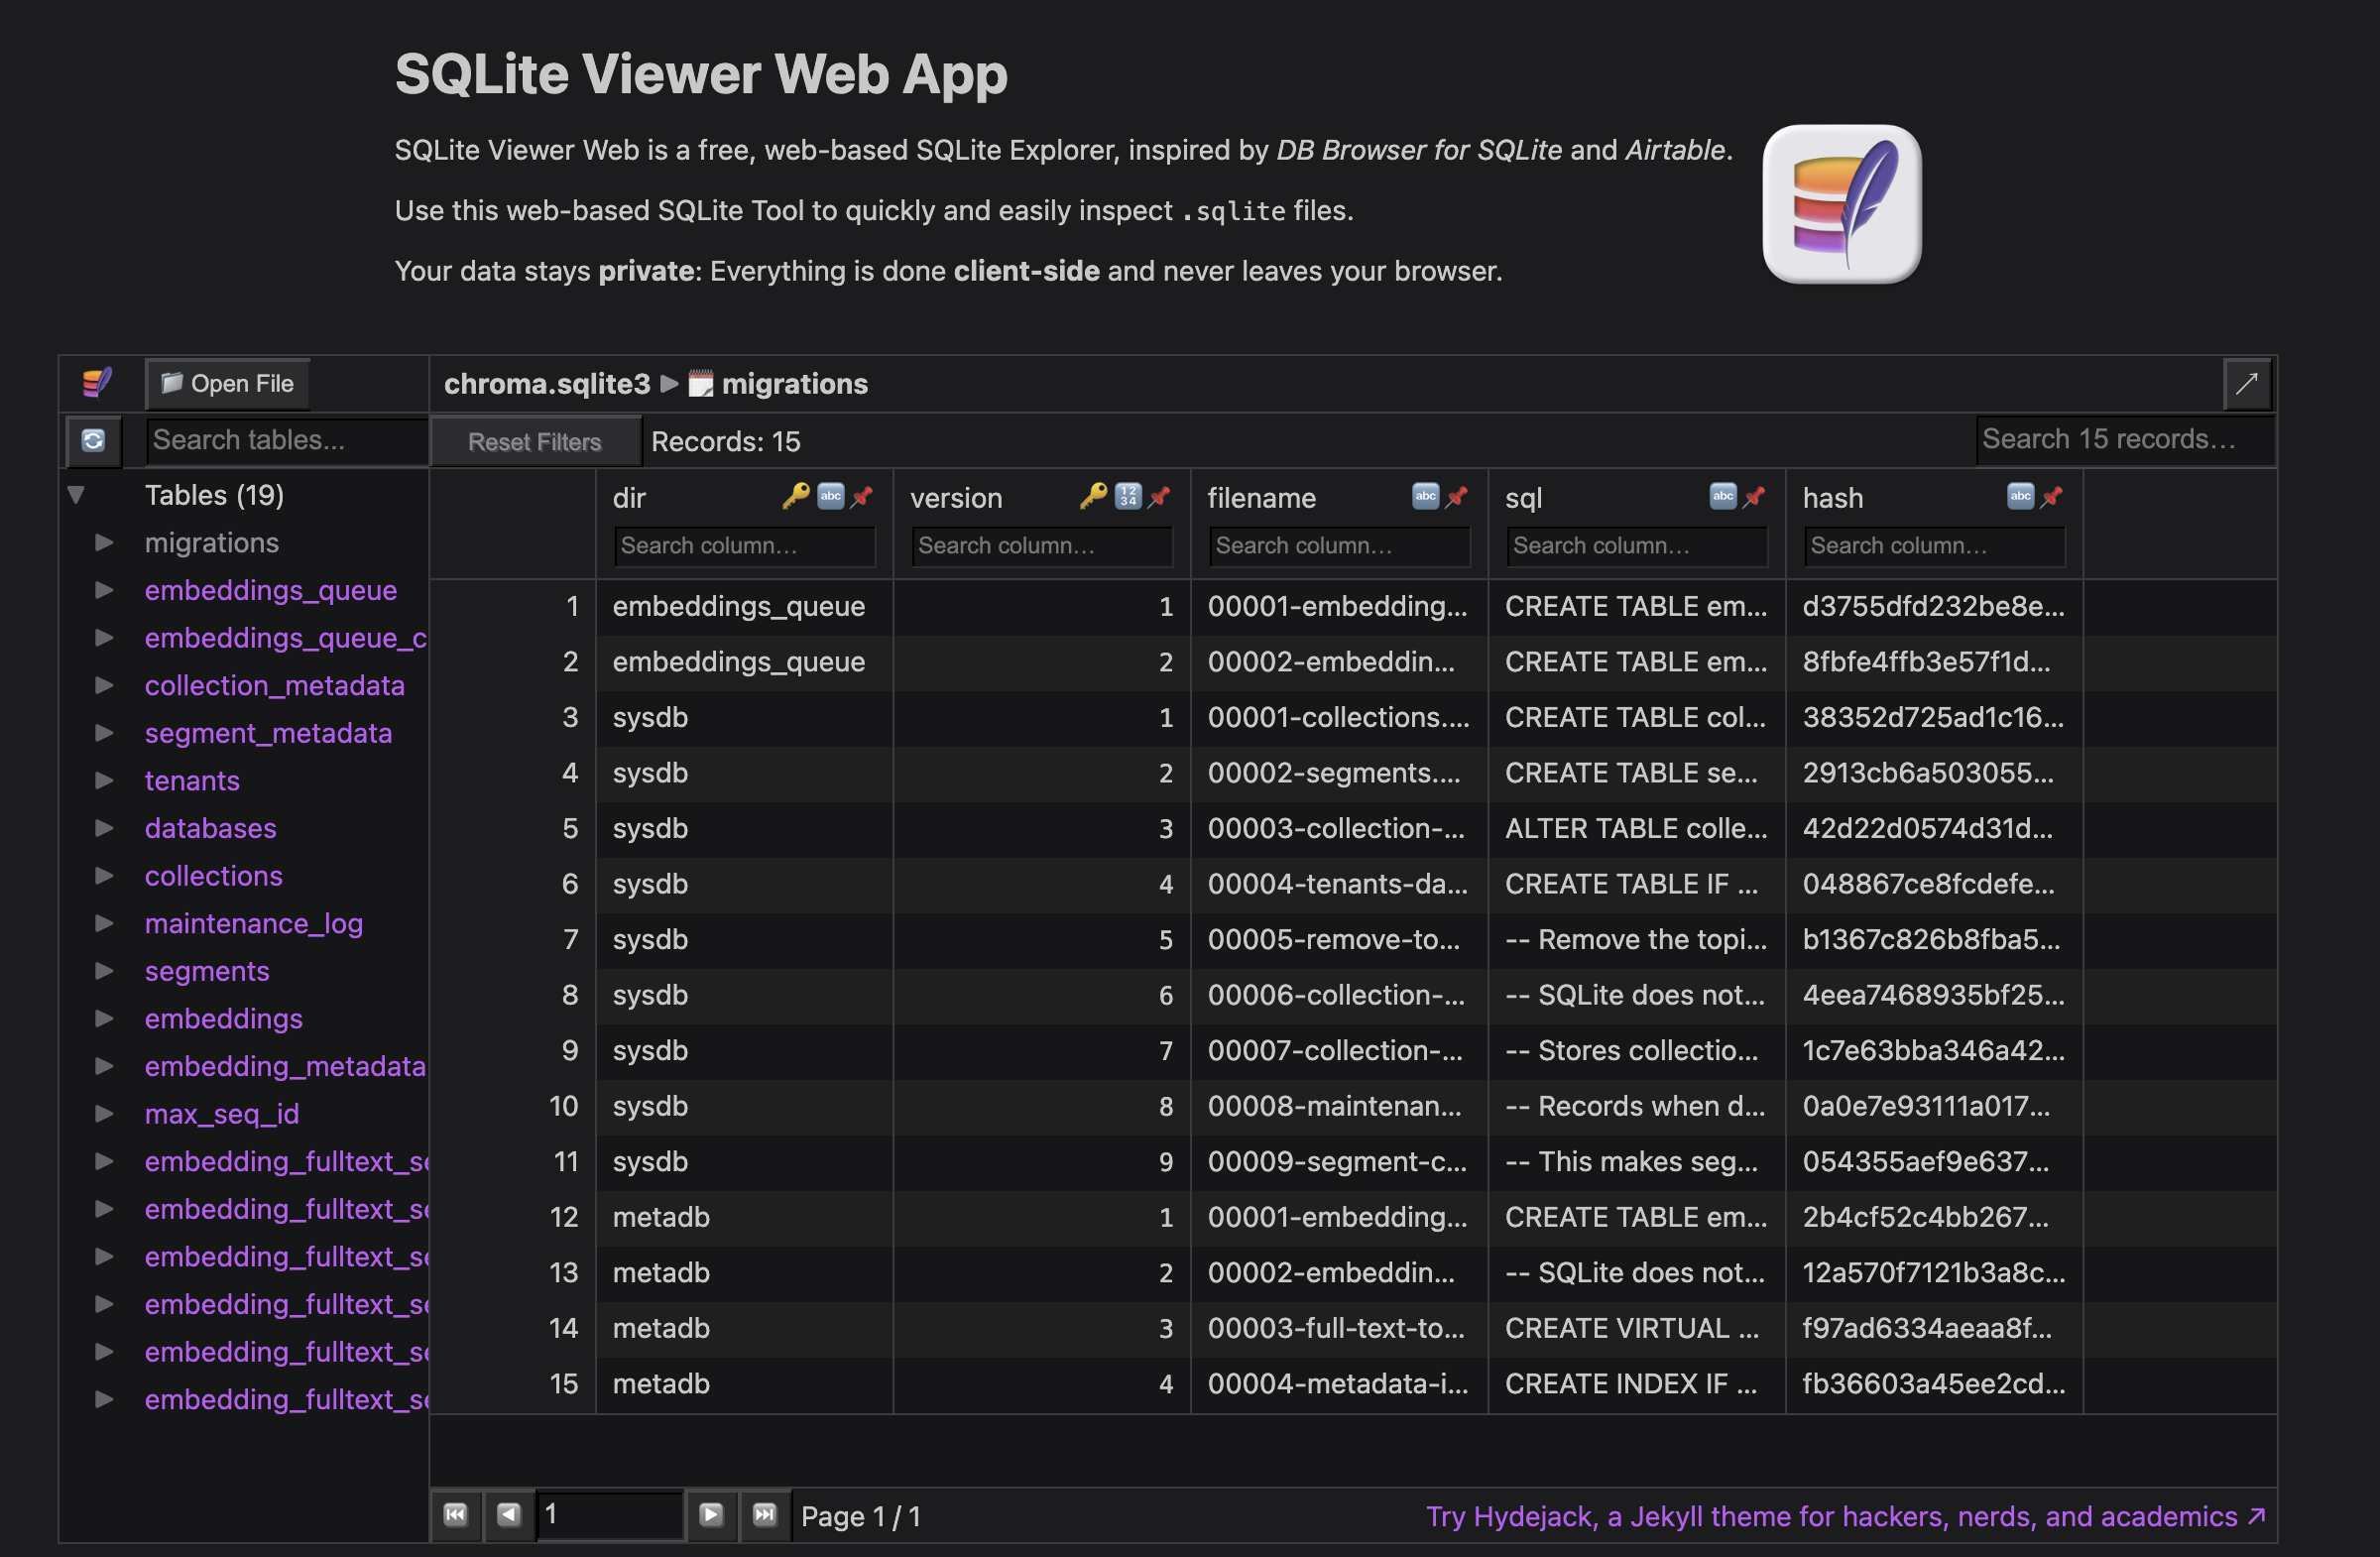